In [1]:
# Created on Mon Nov 23 21:25:16 2020

# @author: KimJo
# @collaborators: Dr. Resop (ps9.ipynb & supplementary files)
# Vertical Lines: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html
# pd.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

# For extra credit:
# pd.read_excel: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
# relativedelta & datetime: https://dateutil.readthedocs.io/en/stable/relativedelta.html
# storing an objects print statement (object as a str): https://stackoverflow.com/questions/55628553/python-how-to-store-a-print-statement-in-a-variable
# np.arrange() [a.k.a. Time vector similar to linspace]: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

In [2]:
%matplotlib inline
from datetime import datetime

from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 120  # make plots bigger by default

# [1] Import and clean CSV file (2 Points)
1. Read the CSV file `BLS_CPS_JAN_2015.csv` into a dataframe
2. Replace the 'Na' strings with `np.nan` so that Pandas will know to treat these as NAN values
3. Convert the columns containing numerics to floats (you may wish to use the Pandas `.to_numeric()` function)

Hint: There are multiple ways to do this:
1. You could use relational operators and dataframe masking.
2. You could use `.apply()` or `.applymap()` method and lambda functions.

https://www.geeksforgeeks.org/difference-between-map-applymap-and-apply-methods-in-pandas/

In [3]:
# Spend some time looking over the CSV file to become familiar with it before you start this problem!

data = pd.read_csv("BLS_CPS_JAN_2015.csv")

data[data == "Na"] = np.nan # Convert "Na" into NaN for usability (mutates original dataframe)

# Why is it that if you dont convert 'Na' to 'NaN' the code below only converts the integers in '_workers' column to floats
# It took me two hours to come up with and bug fix this one line of code (below) in spyder. Yet, all other '_weekly' columns converts just fine.

data = data.apply(lambda x:pd.to_numeric(x, errors = 'ignore', downcast = 'float')) # Converts original numeric data to float

# Display modified DataFrame
data

C:\Users\KimJo\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080.0,809.0,60746.0,895.0,48334.0,726.0
1,MANAGEMENT,12480.0,1351.0,7332.0,1486.0,5147.0,1139.0
2,Chief executives,1046.0,2041.0,763.0,2251.0,283.0,1836.0
3,General and operations managers,823.0,1260.0,621.0,1347.0,202.0,1002.0
4,Legislators,8.0,NaN,5.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...
553,Pumping station operators,18.0,NaN,17.0,NaN,1.0,NaN
554,Refuse and recyclable material collectors,72.0,501.0,66.0,496.0,6.0,NaN
555,Mine shuttle car operators,0.0,NaN,0.0,NaN,0.0,NaN
556,"Tank car, truck, and ship loaders",6.0,NaN,6.0,NaN,0.0,NaN


# [2] Display descriptive stats of the dataframe (2 Points)

In [4]:
# What dataframe method should you use to get a summary of the descriptive statistics?
# Note: We can check out some descriptive statistics of our loaded data...
# ...but ALWAYS look at your data as well! https://en.wikipedia.org/wiki/Anscombe%27s_quartet

data_summary = data.describe()

# Display data summary
data_summary







,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,558.000000,322.000000,558.000000,232.000000,558.000000,192.000000
mean,586.458801,910.052795,326.593201,1002.689636,259.831543,805.432312
std,4758.979492,353.261169,2654.600830,398.311920,2142.557861,305.503784
min,0.000000,354.000000,0.000000,389.000000,0.000000,380.000000
25%,21.000000,626.000000,11.000000,678.750000,3.000000,533.000000
50%,67.000000,856.000000,33.500000,915.500000,18.000000,736.000000
75%,253.000000,1125.250000,121.750000,1265.250000,84.000000,988.500000
max,109080.000000,2041.000000,60746.000000,2251.000000,48334.000000,1836.000000


CHECKPOINT: You should get something like this...
```
         All_workers   All_weekly     M_workers     M_weekly     F_workers     F_weekly 
count     558.000000   322.000000    558.000000   232.000000    558.000000    192.000000  
mean      586.458781   910.052795    326.593190  1002.689655    259.831541    805.432292  
std      4758.979138   353.261167   2654.600532   398.311869   2142.551053    305.503765  
min         0.000000   354.000000      0.000000   389.000000      0.000000    380.000000
25%        21.000000   626.000000     11.000000   678.750000      3.000000    533.000000
50%        67.000000   856.000000     33.500000   915.500000     18.000000    736.000000
75%       253.000000  1125.250000    121.750000  1265.250000     84.000000    988.500000
max    109080.000000  2041.000000  60746.000000  2251.000000  48334.000000   1836.000000 
```

# [3] Select and display the rows with engineering occupations (2 Points)
Note: Do not just select the dataframe row with the all caps ENGINEERING industry row, which is an aggregate of all the engineering occupations. You should select anything that contains the word "engineer" (case should not matter) in the "Occupation" column.

Hint: One approach is to use the `.map()` method and a lambda function to find the substring 'engineer' in the "Occupation" column.

Checkpoint: Your result should have 25 rows.

In [5]:
# Look at the data of just engineers by generating a boolean selection mask

mask = data['Occupation'].map(lambda x: 'engineer' in x.lower())

# Display rows
data[mask == True]





,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
20,Architectural and engineering managers,110.0,1899.0,101.0,1892.0,10.0,NaN
78,ENGINEERING,2656.0,1424.0,2272.0,1452.0,383.0,1257.0
81,Aerospace engineers,140.0,1662.0,122.0,1668.0,18.0,NaN
82,Agricultural engineers,5.0,NaN,5.0,NaN,0.0,NaN
83,Biomedical engineers,12.0,NaN,10.0,NaN,2.0,NaN
84,Chemical engineers,79.0,1532.0,69.0,1583.0,10.0,NaN
85,Civil engineers,316.0,1460.0,275.0,1474.0,41.0,NaN
86,Computer hardware engineers,72.0,1876.0,62.0,1871.0,10.0,NaN
87,Electrical and electronics engineers,283.0,1778.0,246.0,1819.0,37.0,NaN
88,Environmental engineers,35.0,NaN,26.0,NaN,9.0,NaN


# [4] Add computed columns to your dataframe (2 Points)
## [4a] Create two new columns in your dataframe representing data ratios
1. salary_ratio: The ratio of female weekly to male weekly salaries/wages
2. sex_ratio: The ratio of female workers to male workers

## [4b] Generate two new dataframes which select subsets of the data
1. df_by_industry: A dataframe with the rows of the original dataframe which describe entire industries (these are the rows with ALL CAPS occupations)
2. df_by_occupation: A dataframe with the rows of the original dataframe which describe individual occupations (these are the rows which are NOT in all caps)

Hint: You can use a lambda function to compare the occupation to the occupation with `.upper()` called on it to see if it is ALL CAPS or not and use this to create your fancy indexing masks.

In [6]:
# Compute some interesting ratios and create new columns in your dataframe

# Split apart our data set into the portions describing individual occupations and industry averages (all caps)

salary_compute = data['F_weekly'] / data['M_weekly'] # Compute salary ratio from female weekly to male weekly
sex_compute = data['F_workers'] / data['M_workers'] # Compute sex ratio from female workers to male workers

# Add two new column for data generated above
data['salary_ratio'] = salary_compute
data['sex_ratio'] = sex_compute

# Iterate through x (Occupation Data) and returns a boolean dataframe indicating if the occupation was all uppercase
subset_mask = data['Occupation'].map(lambda x:x.isupper())

# Create New DataFrames
df_by_industry = data[subset_mask == True] # All rows containing all caps occupations
df_by_occupation = data[subset_mask == False] # All rows NOT containing all caps occupations


# [5] Create a scatter plot of women's to men's earnings (2 Points)
* Generate a scatter plot of F_weekly vs. M_weekly earnings using the df_by_occupation dataframe
* Add a one-to-one line (i.e. with a slope = 1) to indicate equal pay

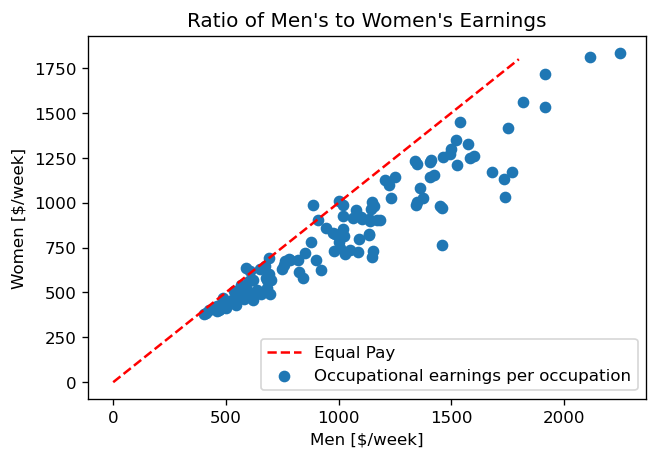

In [7]:

# Scatter Plot
plt.scatter(df_by_occupation['M_weekly'], df_by_occupation['F_weekly'], label = 'Occupational earnings per occupation');
plt.title("Ratio of Men's to Women's Earnings");
plt.xlabel('Men [$/week]');
plt.ylabel('Women [$/week]');
plt.legend();

# Equal Pay Line
x = np.linspace(0, 1800, 1801); # 0 to 1800 using 1801 points between them [0 to 1800 by 1]
y = x; # slope = 1

plt.plot(x, y, 'r--', label = 'Equal Pay');
plt.legend();

CHECKPOINT: Your plot should look something like this:
![](5.png)

# [6] Create bar chart of women's to men's earnings (2 Points)
1. Generate a bar chart of the 10 *occupations* with the highest ratio of women's to men's earnings
2. Generate a bar chart of the 10 *occupations* with the lowest ratio of women's to men's earnings

For both, add a line at 1.0

Hints: 
* You may need to use the `.sort_values()` method
* You may need to use the `.dropna()` method
* You may wish to use the `.set_index()` method before plotting to get a bar chart with the occupations labeled (by making the occupations the index)
* You may wish to use the `.plot.barh()` method of the dataframes to produce your plots, since horizontal bar charts are easier to view
* To select only 10 items, you can use `.iloc` indexing or `.head(10)` or `.tail(10)`

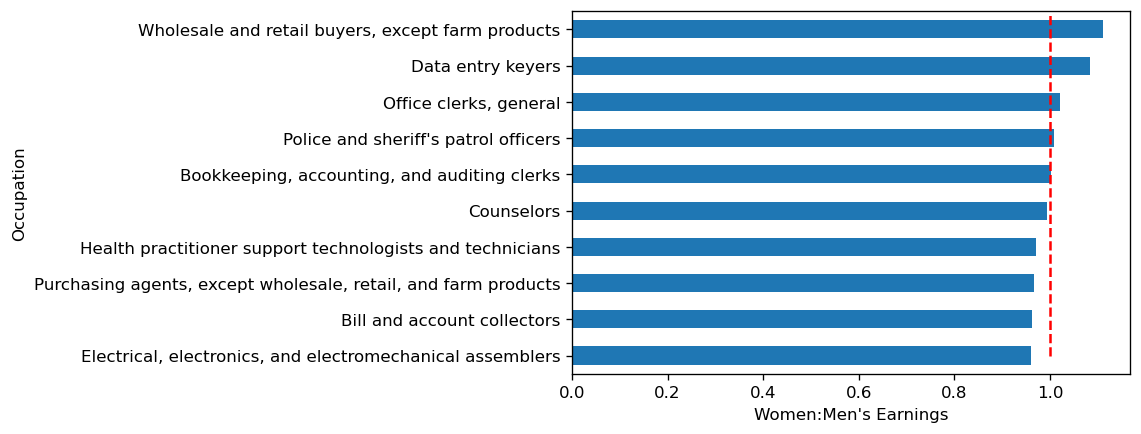

In [8]:
# Put your code for the first bar chart here

# New DataFrame with sorted and appropriate values
baro_df = df_by_occupation.set_index(['Occupation']) # Change index to match occupation instead of 0 - ...
baro_df = baro_df['salary_ratio'].dropna().sort_values() # Drop 'NaN' values and sort 'salary_ratio' from lowest to highest

baro_data_high = baro_df.tail(10) # 10 highest (at the tail end) ratios

baro_data_high.plot.barh();
plt.vlines(1, 0, 10, colors = 'r', linestyles = 'dashed');
plt.xlabel('Women:Men\'s Earnings');



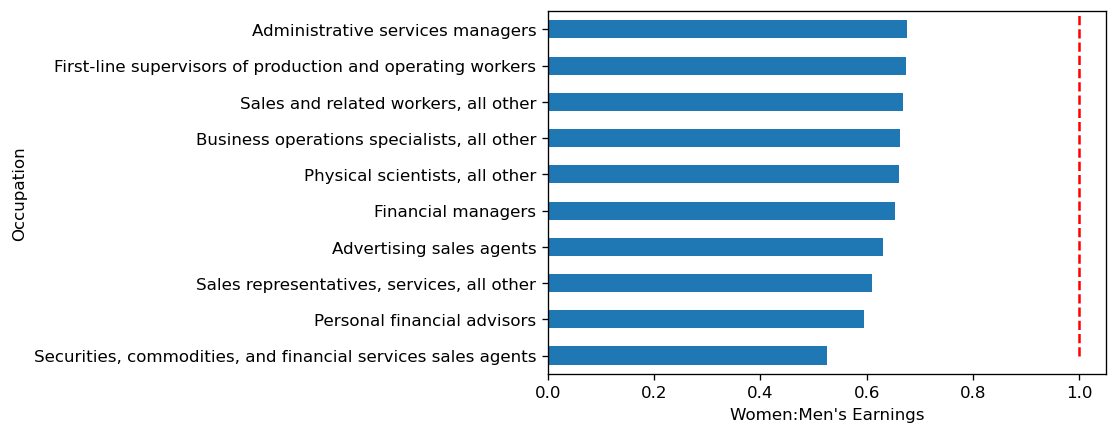

In [9]:
# Put your code for the second bar chart here

baro_data_low = baro_df.head(10) # 10 lowest (at the head front) ratios

baro_data_low.plot.barh();
plt.vlines(1, 0, 10, colors = 'r', linestyles = 'dashed');
plt.xlabel('Women:Men\'s Earnings');



CHECKPOINT: The second barchart should looks something like this:
![](6b.png)

# [7] Create box plot of women's to men's earnings (2 Points)
* Generate a box plot using the df_by_occupation df, plotting the distributions of M_weekly and F_weekly
* The box plot should have two box and whisker plots side by side, one showing the distribution of M_weekly and one showing F_weekly (the y axis should be weekly earnings)

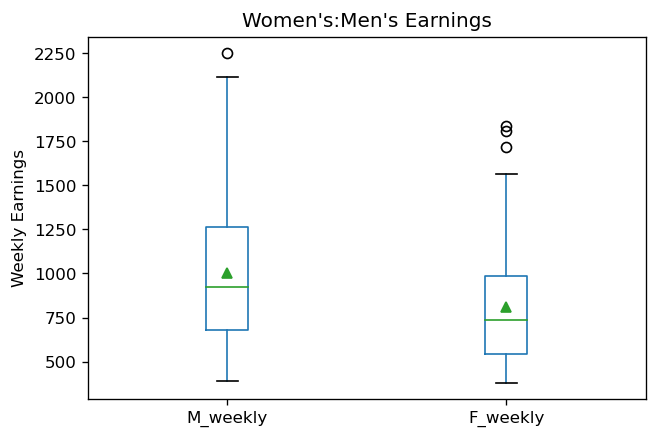

In [10]:
# New DataFrame for box plot data
box_data = df_by_occupation.copy()
box_data = box_data.drop('All_workers', axis = 1)
box_data = box_data.drop('All_weekly', axis = 1)
box_data = box_data.drop('M_workers', axis = 1)
box_data = box_data.drop('F_workers', axis = 1)
box_data = box_data.drop('salary_ratio', axis = 1)
box_data = box_data.drop('sex_ratio', axis = 1)

# Failed method... why?
# box_data = df_by_occupation[['F_weekly'], ['M_weekly']]

# Failed method 2... why?
# box_data = df_by_occupation['F_weekly']
# box_data['M_weekly'] = df_by_occupation['M_weekly'] # Add column 'M_weekly'

f, ax = plt.subplots(); # Create an Axes object "ax"
box_data.plot.box(showmeans = True, ax = ax);
ax.set_title('Women\'s:Men\'s Earnings');
ax.set_ylabel('Weekly Earnings');

# [8] Create bar chart of `salary_ratio` by *industry* (2 Points)
* Sort and plot the dataframe so the industry with the most equal earnings ratio is at the top and the least is at the bottom (i.e. top and bottom assuming you use a horizontal bar chart `.plot.barh()`)

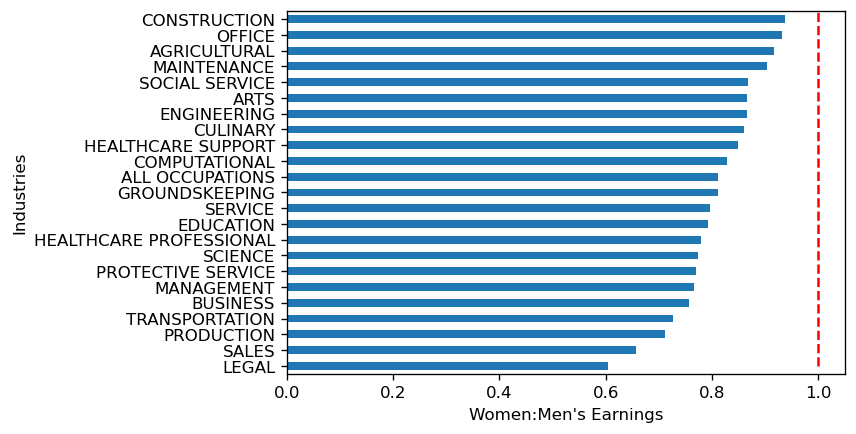

In [11]:
# New DataFrame with sorted and appropriate values
bari_df = df_by_industry.set_index(['Occupation']) # Change index to match industry instead of 0 - ...
bari_df = bari_df['salary_ratio'].dropna().sort_values() # Drop 'NaN' values and sort 'salary_ratio' from lowest to highest

bari_df.plot.barh();
plt.vlines(1, 0, 23, colors = 'r', linestyles = 'dashed');
plt.xlabel('Women:Men\'s Earnings');
plt.ylabel('Industries');

# [9] Create histogram of earnings ratios for all occupations (2 Points)
Hints:
* Use the `plot.hist()` method
* You may want to increase bins above the default value to make this more granular (e.g. `.plot.hist(bins=20)`)
* You only want occupations here, don't include the all caps industry summaries (use the map and lambda approach like before)

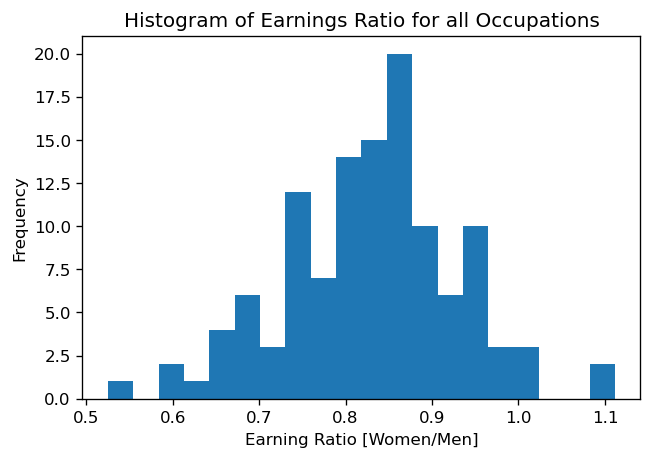

In [12]:
# Histogram

f, ax = plt.subplots(); # Create an axes object "ax"
df_by_occupation['salary_ratio'].plot.hist(bins = 20, ax = ax);
ax.set_title('Histogram of Earnings Ratio for all Occupations');
ax.set_xlabel('Earning Ratio [Women/Men]');

# [10] Create a scatter plot of the sex ratio vs the salary ratio (2 Points)

## [10a] Create a scatter plot of the sex ratio (as x) vs the salary ratio (as y) for the df_by_industry dataframe (properly label your axes)

## [10b] Based on your scatter plot, do you think that there is a relationship between the proportion of women in an industry and how much they earn?

**Double click this cell to edit it and replace this placeholder text with your answer**

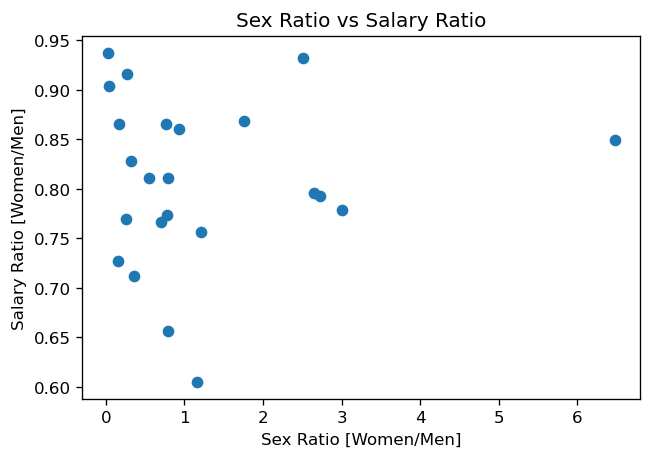

In [13]:
# Put your code for the scatter plot here
plt.scatter(df_by_industry['sex_ratio'], df_by_industry['salary_ratio']);
plt.title("Sex Ratio vs Salary Ratio");
plt.xlabel('Sex Ratio [Women/Men]');
plt.ylabel('Salary Ratio [Women/Men]');


# 10b
# Based on the scatter plot, there does not seem to be a relationship between
# the proportion of women in an industry and how much they earn.
# For each sex ratio there seems to be an equal distribution of salary ratios with
# with no apparent trend overall.(some ratios do not have enough data points to
# make any assumptions or conclusions)

# The final two questions of this problem set *are optional* and involve loading and plotting multiyear data from the BLS CPS survey
# [11] *(Optional)* Read in the data from the two Excel files (+1 Bonus Point)

Load in the multiyear income data from the two Excel files and convert them to a single Pandas Series, where the index is the date (e.g. 4-1-1980 for Q2 1980) and the values are the median earnings.

Hints: 
* You can use the skiprows kwarg of pd.read_excel to skip the BLS header
* To get your data in a single series, there are quite a few approaches you could take. One straightforward approach is to use np.ravel once you have a (selection of a) DataFrame where the numerical values are all of the income values (and nothing else). np.ravel will take a 2d array/matrix and flatten it into a single series.
* If you follow the above approach, you will need to provide your index manually. To build your index, you may wish to use datetime to create your base datetime and the increment it using `relativedelta(months=3 * i)` for each of i entries of data to advance by a quarter
* Once you have your 3 pandas Series objects and/or numpy arrays and/or lists which consist of your datetime index and each of the median incomes by sex, you will need to construct a single dataframe from them. Recall that you can initialize a dataframe with an arbitrary number of columns using a dictionary by `income = pd.DataFrame({'x': x, 'men': y_men, 'women': y_women})`, where x, y_men and y_women are the 3 sets of equal length data you constructed above, and also recall the `.set_index()` method (i.e. for this example `.set_index('x')`.

In [14]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Read excel files into python and skip headers
series_men = pd.read_excel('SeriesReport-20181111141645_men.xlsx', skiprows = 19)
series_women = pd.read_excel('SeriesReport-20181111141648_women.xlsx', skiprows = 19)

i = 0
datelist = [] # Template for rescaled DataFrame year + quarter

for year in range(1979, 2019): # 1979 - 2018
    dt = datetime(year, 1, 1) # (Years, months, day)
    
    for i in range(0, 4):
        delta = relativedelta(months = 3 * i)    
        new_date = str(dt+delta)[:10] # Store only the date, not seconds and such, also store string/print output of datetime.   
        datelist.append(new_date)
        i += 1

# Median Earning Values Preparation
series_men = series_men.drop('Year', axis = 1)
series_men = series_men.drop('Unnamed: 5', axis = 1)
series_men = series_men.transpose() # Transpose so .applymap() will read and append with function elementwise by row

median_earnings_men = [] # List to be added to DataFrame
series_men.applymap(lambda x: median_earnings_men.append(x)) # Append all data into a list in order corresponding to the adjusted dates

# For some reason applymap is evaluating and appending the first column (transposed row) twice... I could not find a solution to this so
# I opted to manually remove the first 4 values in the first column/transposed-row
median_earnings_men.remove(408.0)
median_earnings_men.remove(405.0)
median_earnings_men.remove(399.0)
median_earnings_men.remove(393.0)

series_women = series_women.drop('Year', axis = 1)
series_women = series_women.drop('Unnamed: 5', axis = 1)
series_women = series_women.transpose() # Transpose so .applymap() will read and append with function elementwise by row

median_earnings_women = [] # List to be added to DataFrame
series_women.applymap(lambda x: median_earnings_women.append(x)) # Append all data into a list in order corresponding to the adjusted dates

# Same goes for this series
median_earnings_women.remove(251.0)
median_earnings_women.remove(250.0)
median_earnings_women.remove(251.0)
median_earnings_women.remove(249.0)

# Create Single DataFrame of the data
income = pd.DataFrame({'x': datelist, 'men': median_earnings_men, 'women': median_earnings_women})
income = income.set_index('x')

# Display checkpoint
income.head(8)

,men,women
x,,
1979-01-01,408.0,251.0
1979-04-01,405.0,250.0
1979-07-01,399.0,251.0
1979-10-01,393.0,249.0
1980-01-01,385.0,244.0
1980-04-01,378.0,243.0
1980-07-01,380.0,245.0
1980-10-01,377.0,242.0


CHECKPOINT: Assuming you construct a DataFrame called income as described above, printing `income.head(8)` should return this:

```
              men  women
x                       
1979-01-01  408.0  251.0
1979-04-01  405.0  250.0
1979-07-01  399.0  251.0
1979-10-01  393.0  249.0
1980-01-01  385.0  244.0
1980-04-01  378.0  243.0
1980-07-01  380.0  245.0
1980-10-01  377.0  242.0
```

# [12] *(Optional)* Plot the median income by year and sex (+1 Bonus Point)
* Make sure you label your axes and provide a chart title.

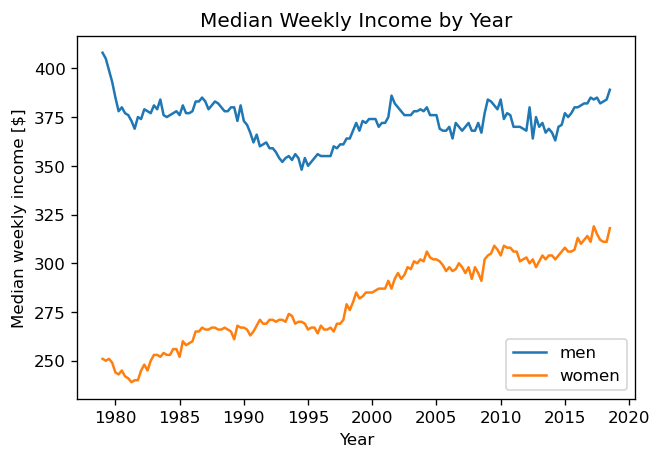

In [15]:
x = np.arange(1979,2019,.25) # Represents time vector corresponding to median quarterly income data

plt.plot(x, income['men'], label = 'men')
plt.plot(x, income['women'], label = 'women')

plt.title('Median Weekly Income by Year')
plt.xlabel('Year')
plt.ylabel('Median weekly income [$]')
plt.legend();






CHECKPOINT: Your plot should look something like this
![](12.png)